## Taylor Polynomials
### prob 1

Consider the function $f(x)=\cos(\pi x/2)$.

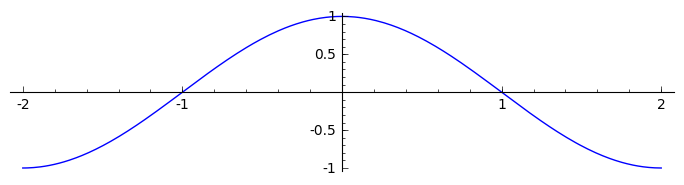

In [1]:
f = cos(pi*x/2)
p = f.plot((x, -2, 2))
p.show(figsize = [7, 2])

We expand $f(x)$ in a Taylor series about the point $x_0=0$.

Since (about $x = 0$)
$$\cos x = \sum^{\infty}_{n=0} \frac{(-1)^n}{(2n)!} x^{2n} =  1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \cdots$$
our Taylor expansion is just

In [2]:
f.series(x, 8)

1 + (-1/8*pi^2)*x^2 + (1/384*pi^4)*x^4 + (-1/46080*pi^6)*x^6 + Order(x^8)

In [3]:
# here's the 6th degree Taylor polynomial
f.taylor(x, 0, 6)

-1/46080*pi^6*x^6 + 1/384*pi^4*x^4 - 1/8*pi^2*x^2 + 1

We find an expression for the remainder $R_n = f - P_n$ between the function $f$ and its $n$th degree Taylor $P_n$ polynomial.

By Taylor's theorem, there exists an $\xi(x)$ between $x$ and the origin such that
$$R_n(x) = \frac{x^{n+1}}{(n+1)!}f^{(n+1)}(\xi).$$

Since $f(x) = \cos\frac\pi2 x$, we can express derivatives as 
$$f^{(k)}(x) = (\pi/2)^k\cos\left(\frac\pi2(x + k)\right)$$

In [4]:
# some evidence for the claim
for k in range(4):
    error(x) = f.diff(x, k) - (pi/2)^k*cos((pi/2)*(x + k))
    print bool(error == 0)

True
True
True
True


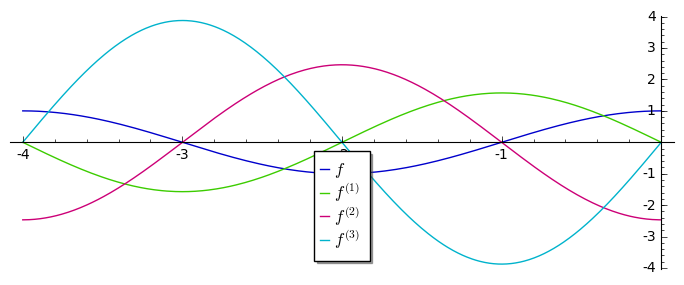

In [5]:
# and graphically, we see differentiation is just translation and scaling
plot([f.diff(x, k) for k in range(4)], (x, -4, 0), 
     legend_label = ['$f$','$f^{(1)}$', '$f^{(2)}$', '$f^{(3)}$'],
     figsize = [7,3])

Whence 
$$
R_n(x) = \frac{x^{n+1}}{(n+1)!}(\pi/2)^{(n+1)}\cos\left(\frac\pi2(\xi + n + 1)\right) \quad \text{for some $\xi$ between $x$ and the origin.}
$$

We estimate the number of terms required to guarantee <!---six-significant-digit---> 
accuracy for $f(x)$ within $10^{-5}$  for all $x$ in the interval $[-1, 1]$.

The error $\left|P_n(x) - f\right|$ is just $\left|R_n(x)\right|$.

Since $\cos \colon \mathbf{R} \to [-1,1]$, for whatever $\xi$, we have the inequality 
$$
\left|R_n(x)\right| \leq \left|\frac{x^{n+1}}{(n+1)!}(\pi/2)^{(n+1)}\right|.
$$

Further, we notice 
$$ 
\max_{\substack{x \in [-1, 1]}} \left|\frac{x^{n+1}}{(n+1)!}(\pi/2)^{(n+1)}\right| = \frac{(\pi/2)^{(n+1)}}{(n+1)!}.
$$
which is our desired error bound. 

To find $n$ such that $\left|R_n(x)\right| \leq \varepsilon$ with $\varepsilon = 10^{-5}$, we iterate.

In [6]:
from math import factorial

n = 0; eps = 10**(-5)
error_bound = lambda n : ((pi/2)**(n+1))/factorial(n+1)

while error_bound(n) > eps:
    n += 1
n

10

We plot $f(x)$ and its 1st, 3rd, 5th and 7th degree Taylor polynomials over $[-2, 2]$.

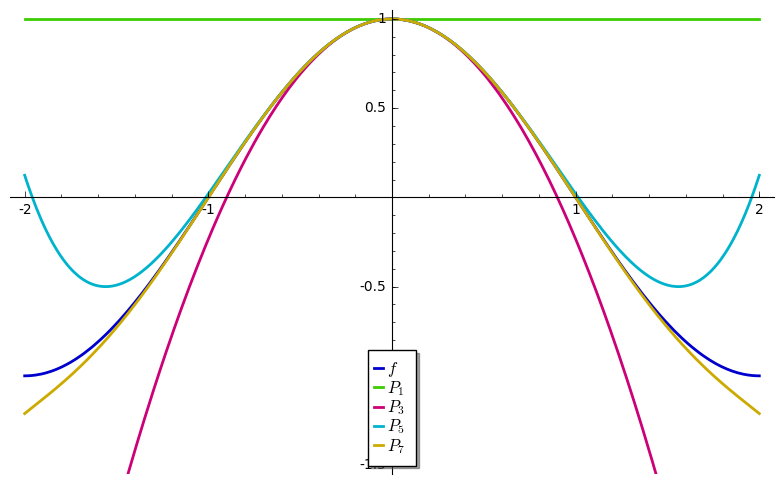

In [7]:
curves = [f] + [f.taylor(x,0,i) for i in [1,3,5,7]]
p = plot(curves, (x,-2,2), 
         legend_label = ['$f$','$P_1$', '$P_3$', '$P_5$', '$P_7$'],
         thickness = 2.0)
p.show(ymin = -1.5, figsize = [8,5])

### prob 2

We define a fixed point iteration function, which returns a list with 2 entries
- a list of the first so many terms in the fixed point iteration sequence
- the last term before the function halts fixed point iteration

In [8]:
def fixedpt(g, approx, eps, Nmax, SAVELIST = True):
    i=0; previous = float("inf"); seq = [approx]
    while abs(approx - previous) > eps and i < Nmax:
        previous = approx
        approx = g(x=approx)
        i += 1
        if SAVELIST:
            seq = seq + [approx]
    return [seq, N(approx)]

We'll consider a few fixed point iteration schemes. Each of the following functions $g$ have a fixed point $\alpha$. But which converge to $\alpha$ (provided $|x_0-\alpha|$ is sufficiently small)? (For discussion on *writing* such an iterator function, see [fixed point iteration: finding g(x)](https://math.stackexchange.com/questions/2053965/fixed-point-iteration-finding-gx?rq=1) on Stack Exchange.)

If it does converge, we'll give the
order of convergence; for linear convergence, give the rate of
linear convergence (i.e., the asymptotic constant).  In the case
that $g^{\prime}(\alpha)=0$, we'll expand $g(x)$ in a Taylor
polynomial about $x=\alpha$ to determine the order of convergence. 

### prob 2 (a)

Consider the fixed point iteration (to find $\alpha=2$).
$$x_{n+1}=-16+6x_n+\frac{12}{x_n}$$

In [9]:
g = -16 + 6*x + 12/x
approx=2.1; eps=10^(-15); Nmax=10
fixedpt(g, approx, eps, Nmax)

[[2.10000000000000,
  2.31428571428571,
  3.07089947089947,
  6.33304672201985,
  23.8931029233178,
  127.860854525974,
  751.258979179941,
  4491.56984826643,
  26933.4217612703,
  161584.531013165,
  969491.186153253],
 969491.186153253]

Starting with $x_0= 2.1$, this iteration scheme diverges, as evinced by the above sequence of values and the following graphs.

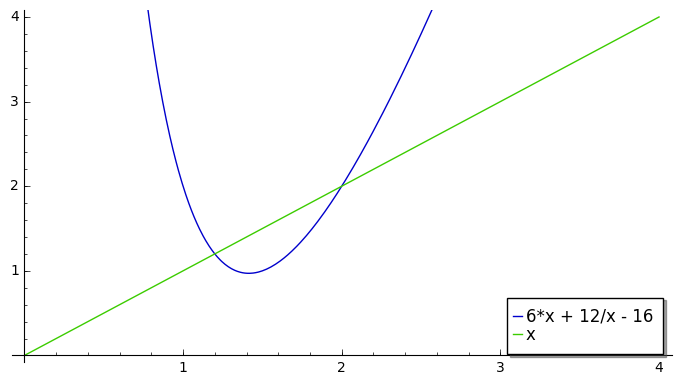

In [10]:
A = plot([g, x], (x, 0, 4), ymin=0, ymax=4, legend_label = 'automatic')
show(A, figsize = [7,4])

We'll generate [cobweb plots](https://en.wikipedia.org/wiki/Cobweb_plot) to get some intuition as to why these iterations diverge.

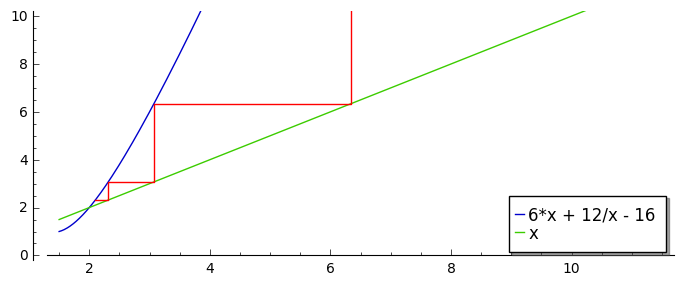

In [11]:
approx=2.1; eps=10^(-15); Nmax=10

seq = fixedpt(g, approx, eps, Nmax)[0]
points = []
for i in range(Nmax):
    points.append((seq[i], seq[i+1]))
    points.append((seq[i+1], seq[i+1]))

h = 10
A = plot([g, x], xmin=1.5, xmax=1.5+h, ymin = 0, ymax = h, legend_label = 'automatic') 
B = list_plot(points, xmin=1.5, xmax=1.5+h, ymin = 0, ymax = h, plotjoined = True, color = 'red')
show(A+B, figsize = [7,3])

We can also try the iteration scheme from just below $\alpha$; this sequence also diverges.

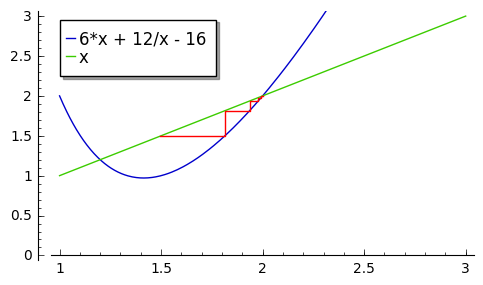

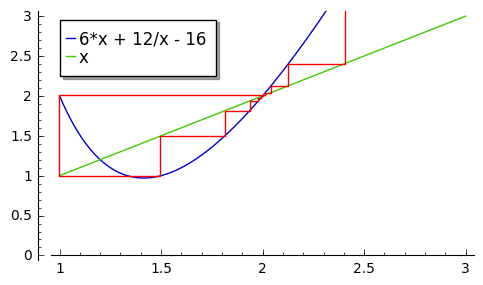

In [12]:
approx=1.99999; eps=10^(-15); Nmax=10

seq = fixedpt(g, approx, eps, Nmax)[0]
points = []
for i in range(Nmax):
    points.append((seq[i], seq[i+1]))
    points.append((seq[i+1], seq[i+1]))

h = 1
A = plot([g, x], xmin=2-h, xmax=2+h, ymin = 0, ymax = 2+h, legend_label = 'automatic') 
B = list_plot(points, xmin=2-h, xmax=2+h, ymin = 0, ymax = 2+h, plotjoined = True, color = 'red')
show(A+B, figsize = [5,3])

approx=1.99999; eps=10^(-15); Nmax=25

seq = fixedpt(g, approx, eps, Nmax)[0]
points = []
for i in range(Nmax):
    points.append((seq[i], seq[i+1]))
    points.append((seq[i+1], seq[i+1]))

h = 1
A = plot([g, x], xmin=2-h, xmax=2+h, ymin = 0, ymax = 2+h, legend_label = 'automatic') 
B = list_plot(points, xmin=2-h, xmax=2+h, ymin = 0, ymax = 2+h, plotjoined = True, color = 'red')
show(A+B, figsize = [5,3])

Additionally, we consider the other fixed point $1.2$ (from below and from above); it seems the graph of $g$ is *too steep* for convergence.

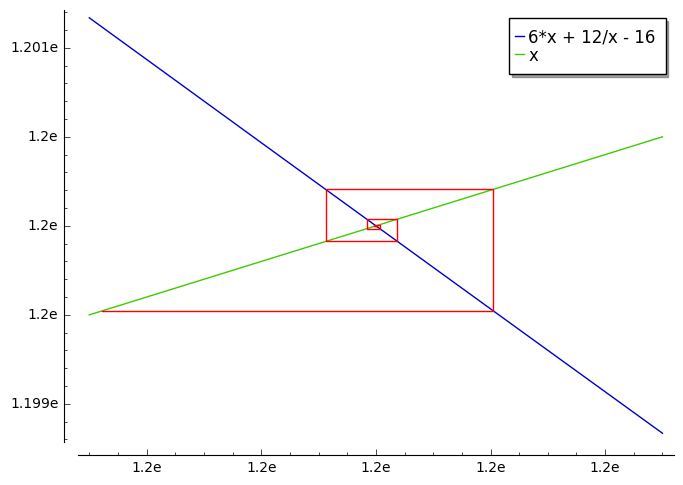

In [13]:
#below
approx=1.1999999; eps=10^(-15); Nmax=10
seq = fixedpt(g, approx, eps, Nmax)[0]
points = []
for i in range(Nmax):
    points.append((seq[i], seq[i+1]))
    points.append((seq[i+1], seq[i+1]))

h = 0.5*10^(-3)
A = plot([g, x], (x, 1.2-h, 1.2+h), legend_label = 'automatic')
B = list_plot(points, plotjoined = True, color = 'red')
show(A+B, figsize = [7,5])

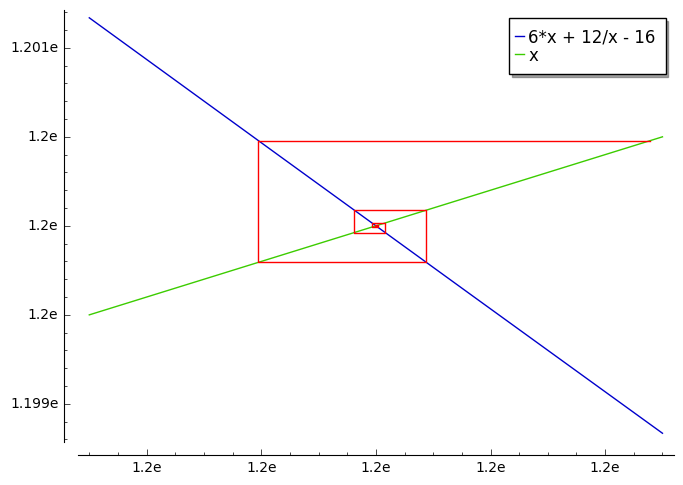

In [14]:
# from above
approx=1.2000001; eps=10^(-15); Nmax=10
seq = fixedpt(g, approx, eps, Nmax)[0]
points = []
for i in range(Nmax):
    points.append((seq[i], seq[i+1]))
    points.append((seq[i+1], seq[i+1]))

h = 0.5*10^(-3)
A = plot([g, x], (x, 1.2-h, 1.2+h), legend_label = 'automatic')
B = list_plot(points, plotjoined = True, color = 'red')
show(A+B, figsize = [7,5])

Looking at $g'$ at both $1.2$ and $2$, we see

In [15]:
print "g'(1.2) = " + str(g.diff(x)(x=1.2))
print "g'(2.0) = " + str(g.diff(x)(x=2))

g'(1.2) = -2.33333333333333
g'(2.0) = 3


### prob 2 (b)

Now consider the iteration scheme (to find the fixed point $\alpha=3^{1/3}$)
$$x_{n+1}=\frac{2}{3}x_n+\frac{1}{x_n^2}$$

To determine if this iteration scheme produces a convergent sequence, we'll state a simple existence theorem.

Let $g:[a,b] \to [a,b]$ be a continuous function with $g$ differentiable on $(a,b)$ and $|g'(x)|<1$ for all $x$ in $(a,b)$. Then the sequence $\{p_n\}$ generated by $p_n = g(p_{n-1})$ converges to the fixed point $p$ for any initial point $p_0 \in (a,b)$.

Looking at the following graph, it seems likely that the fixed point iterator will produce a convergent sequence. We'll construct a cobweb diagram before rigorously demonstrating the sequence converges.

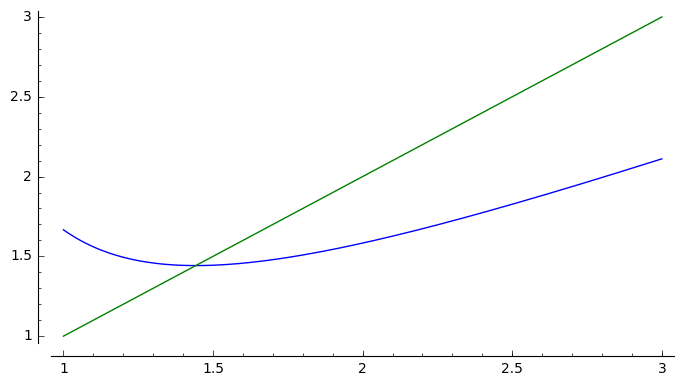

In [16]:
g = (2/3)*x + 1/(x^2)
xmin = 1; xmax = 3
a = plot(g, (x, xmin, xmax))
b = plot(x, (x, xmin, xmax), color = 'green')
show(a+b, figsize = [7,4])

In [17]:
# from above
approx=1.5; eps=10^(-15); Nmax=10
fixedpt(g, approx, eps, Nmax)

[[1.50000000000000,
  1.44444444444444,
  1.44225290379137,
  1.44224957031511,
  1.44224957030741,
  1.44224957030741],
 1.44224957030741]

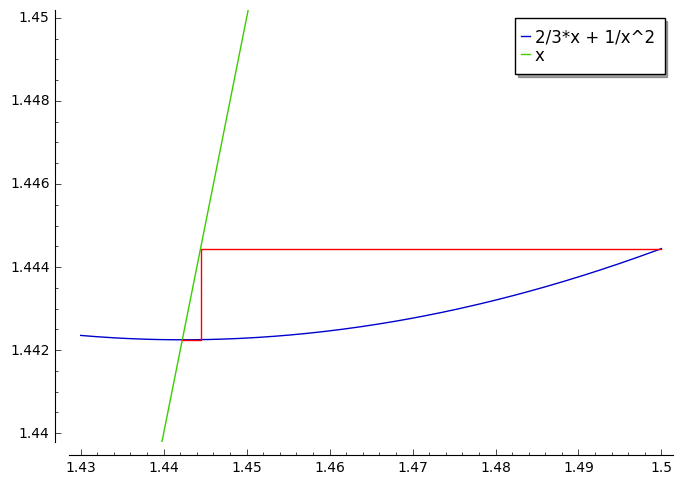

In [18]:
# cobweb from above
seq = fixedpt(g, approx, eps, Nmax)[0]
points = []
for i in range(len(seq)-1):
    points.append((seq[i], seq[i+1]))
    points.append((seq[i+1], seq[i+1]))

h = 0.07
A = plot([g, x], (x, approx-h, approx), ymax = 1.45, ymin =1.44, legend_label = 'automatic')
B = list_plot(points, plotjoined = True, color = 'red')
show(A+B, figsize = [7,5])

In [19]:
# from below
approx=1.3; eps=10^(-15); Nmax=10
fixedpt(g, approx, eps, Nmax)

[[1.30000000000000,
  1.45838264299803,
  1.44242738117535,
  1.44224959222560,
  1.44224957030741,
  1.44224957030741],
 1.44224957030741]

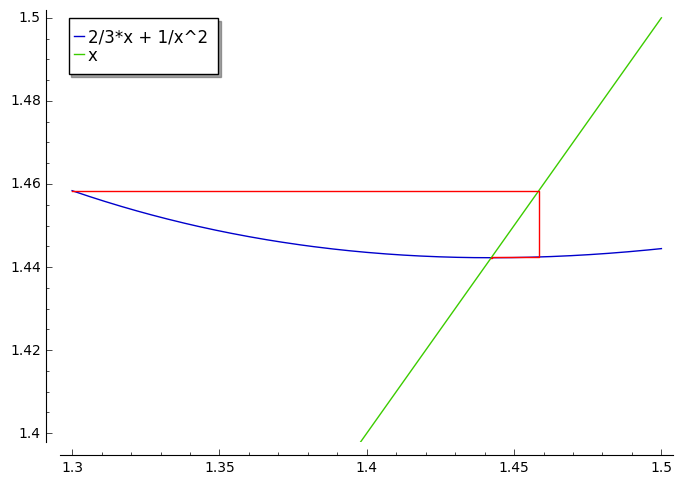

In [20]:
# cobweb from below
seq = fixedpt(g, approx, eps, Nmax)[0]
points = []
for i in range(len(seq)-1):
    points.append((seq[i], seq[i+1]))
    points.append((seq[i+1], seq[i+1]))

A = plot([g, x], xmin=1.3, xmax=1.5, ymin=1.4, ymax=1.5, legend_label = 'automatic')
B = list_plot(points, plotjoined = True, color = 'red')
show(A+B, figsize = [7,5])

In this case $g^{\prime}(\alpha)=0$, so we'll try expanding $g(x)$ in a Taylor
polynomial about $x=\alpha$ to determine the order of convergence. 

In [21]:
show(g.taylor(x, 3^(1/3), 4))

5/9*(x - 3^(1/3))^4 - 4/9*3^(1/3)*(x - 3^(1/3))^3 + 1/3*3^(2/3)*(x - 3^(1/3))^2 + 3^(1/3)

As the smallest non-zero power of $g$'s Taylor series representation is $2$, 
we ought to suspect the order of convergence is $2$. 

To numerically confirm this intuition, consider $$r \approx \frac{\ln{E_n}}{\ln{E_{n-1}}},$$ where $E_n = |x_n - \alpha| \approx |x_n - x_{n+1}|$.

In [22]:
# we find r approximated at different steps n
rate_approx = []
for j in [1..len(seq)-2]:
    rate_approx.append(log(abs(seq[j]-seq[j+1]))/log(abs(seq[j-1]-seq[j])))
    
rate_approx

[2.24554929318992, 2.08675279479323, 2.04240018648047, 2.00445730406457]

Aside: is the asymptotic error constant given by $C = g''(3^{1/3}) \approx 1.386$? No.

In [23]:
N(g.diff(x,2)(x=3^(1/3)))

1.38672254870127

Why not? Consider a set of starting points for the fixed point iteration scheme
$$\texttt{starts} = \{1.1, 1.2, 1.3, 1.4, 1.5, 1.6\}$$
and look at the sequences of values generated.

In [24]:
# halting parameters
eps=10^(-20); Nmax=10

# starting points
starts = [1.1, 1.2, 1.3, 1.4, 1.5, 1.6]

# sequences generated from starting points
seqs = []
for start in starts:
    seqs.append(fixedpt(g, start, eps, Nmax)[0])

Aside: is the order of this method $r = 2$?

By definition, a sequence ${x_n}$ converges to $\alpha$ of *order* $r$ with asymptotic error constant $C$ iff 
$$\lim_{n\to\infty} \frac{|x_n - \alpha|}{|x_{n-1} - \alpha|^r} = C.$$

We'll estimate $C$ by evaluating the ratio $|x_{n+1} - x_n|:|x_{n} - x_{n-1}|^r$ for all $n$ in $\{0,1,2,3,4\}$.

In [25]:
r = 2

for i in range(len(seqs)):
    print("starting at " + str(N(starts[i], digits = 2)))
    for j in range(5):
        print("E_"+str(j+1)+":(E_"+str(j)+")^"+str(r)+" ~ "+str(abs(seqs[i][j+1]-seqs[i][j])/abs(seqs[i][j]-seqs[i][j-1])^r))
    print("")

starting at 1.1
E_1:(E_0)^2 ~ 3.92521896530955
E_2:(E_1)^2 ~ 0.515127403734279
E_3:(E_2)^2 ~ 0.723722620291041
E_4:(E_3)^2 ~ 0.696087035559723
E_5:(E_4)^2 ~ 0.693377765497636

starting at 1.2
E_1:(E_0)^2 ~ 5.01738392104314
E_2:(E_1)^2 ~ 0.581252332057324
E_3:(E_2)^2 ~ 0.708606891994268
E_4:(E_3)^2 ~ 0.693936927079967
E_5:(E_4)^2 ~ 0.693356049491765

starting at 1.3
E_1:(E_0)^2 ~ 7.82718609595824
E_2:(E_1)^2 ~ 0.636046348028419
E_3:(E_2)^2 ~ 0.698388201565812
E_4:(E_3)^2 ~ 0.693418242131110
E_5:(E_4)^2 ~ 0.924401492637500

starting at 1.4
E_1:(E_0)^2 ~ 24.3903507867735
E_2:(E_1)^2 ~ 0.678813844638179
E_3:(E_2)^2 ~ 0.693773107480024
E_4:(E_3)^2 ~ 0.693423633803438
E_5:(E_4)^2 ~ 0.000000000000000

starting at 1.5
E_1:(E_0)^2 ~ 16.6577774285817
E_2:(E_1)^2 ~ 0.710059171597676
E_3:(E_2)^2 ~ 0.694062057080989
E_4:(E_3)^2 ~ 0.693365858877836
E_5:(E_4)^2 ~ 0.000000000000000

starting at 1.6
E_1:(E_0)^2 ~ 5.73466736902171
E_2:(E_1)^2 ~ 0.731003100856789
E_3:(E_2)^2 ~ 0.698057272096944
E_4:(E_3)

Do the above ratios converge? Well, the algorithm quits after a certain degree of precision, so we'll only consider the good middle values. 

TODO: Firm up definition of asymptotic error constant, by varying $r$ and while looking for convergent values $C$.

Plotting $r$ against $\sigma^2_C$ (the standard deviation of the `E_4:(E_3)^r`'s generated above), we find:

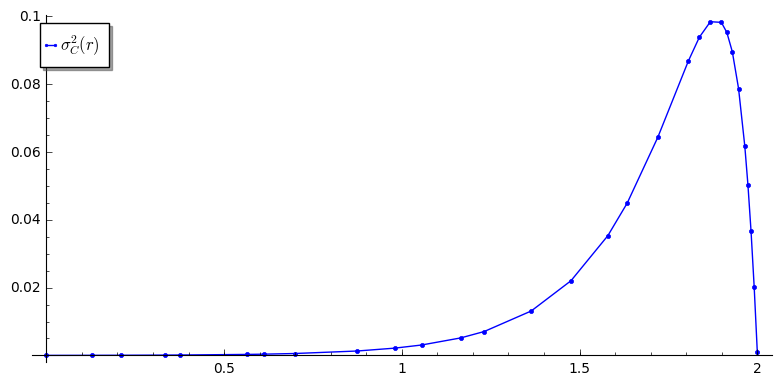

In [26]:
def std_C(r):
    return std([abs(seqs[i][3+1]-seqs[i][3])/abs(seqs[i][3]-seqs[i][3-1])^r for i in range(len(starts))])

var('r')
plot(std_C(r), (r,0,2), plot_points=20, 
     marker='.', legend_label= '$\\sigma^2_C(r)$',
     figsize = [8,4])

Well, while varying $r$, we find that the approximate $C$ have *no deviation* about $r=2$. As we need our iterative scheme to converge upon an asymptotic error constant, I continue to suspect $r=2$. (Update: this can/will be theoretically shown.)

TODO: find $r$ and $C$ rigorously.

### prob 2 (c)

Lastly, consider (to find the fixed point $\alpha=3$)
$$x_{n+1}=\frac{12}{1+x_n}, $$

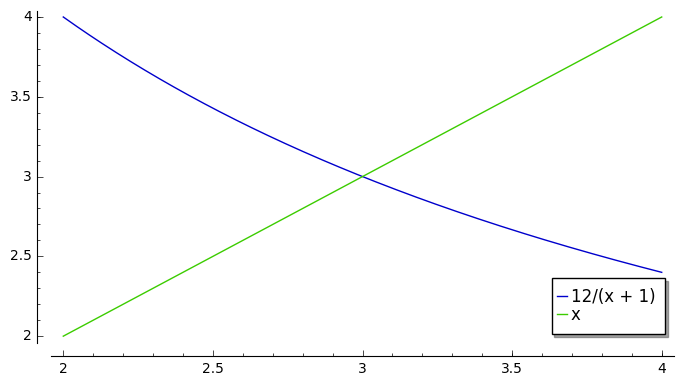

In [27]:
g = 12/(1+x)
xmin = 2; xmax = 4
plot([g,x], (x, xmin, xmax), legend_label = 'automatic', figsize=[7,4])

In [28]:
# notice the derivative at x = 3 is small enough, and this is likely the asymptotic error constant
abs(g.diff(x,1)(x=3))

3/4

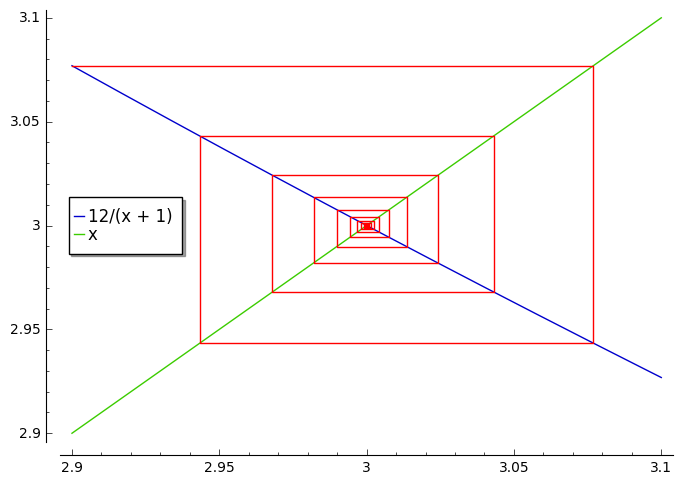

In [29]:
# cobweb diagram from starting point 2.9
approx=2.9; eps=10^(-15); Nmax=20
seq = fixedpt(g, approx, eps, Nmax)[0]
points = []
for i in range(len(seq)-1):
    points.append((seq[i], seq[i+1]))
    points.append((seq[i+1], seq[i+1]))

# draw the figure
h = 0.1
A = plot([g, x], xmin=3-h, xmax=3+h, ymin=3-h, ymax=3+h, legend_label = 'automatic')
B = list_plot(points, plotjoined = True, color = 'red')
show(A+B, figsize = [7,5])

In [30]:
# halting parameters
eps=10^(-20); Nmax=20

# starting points
starts = [2.9, 2.95, 2.99, 3.01, 3.05, 3.1]

# sequences generated from starting points
seqs = []
for start in starts:
    seqs.append(fixedpt(g, start, eps, Nmax)[0])

Again, I'm not sure how to determine the order of convergence $r$. 
Theoretically, I'm led to believe that $r = 1$ and
the asymptotic error constant $C$ is bounded by 

$$ C \leq \max_{\substack{x \in [2.8,3.2]}}|g'(x)| $$

We can verify this hunch by comparing the numerically determined asymptotic constants to the maximum slope on the interval $[2.8,3.2]$.

In [31]:
# numerically determined C from differnt starting points
r = 1
[abs(seqs[i][10+1]-seqs[i][10])/abs(seqs[i][10]-seqs[i][10-1])^r for i in range(len(starts))]

[0.749642720979530,
 0.749822700352781,
 0.749964751571779,
 0.750035143620742,
 0.750174679326877,
 0.750346795995921]

In [32]:
# max slope on [2.8,3.2]
max([abs(g.diff(x,1)(x=start)) for start in starts])

0.788954635108481

### prob 3

Let $\alpha$ be a fixed point of $g(x)$. 
Consider the fixed-point iteration $x_{n+1}
=g(x_n)$ and suppose that $\max_x\left|g'(x)\right|=k<1$. 

I claim $\left|\alpha-x_{n+1}\right|\le \frac{k}{1-k}\left|x_{n+1}-x_n\right|.$

*Proof*. 

We desire
$(1-k)\left|\alpha-x_{n+1}\right|\le k\left|x_{n+1}-x_n\right|.$

Suppose $g\colon[\alpha, x_n]\to[\alpha,x_n]$ is a continuous function, differentiable on $(\alpha, x_n)$. Then the [mean value theorem](https://calculus.subwiki.org/wiki/Lagrange_mean_value_theorem) implies there's a $\xi$ in $(\alpha,x_n)$ such that 
$\frac{g(\alpha) - g(x_n)}{\alpha -x_n} = g'(\xi).$

Moving the denominator, taking absolute values, 
and noting $k = \max_x\left|g'(x)\right|$, we find
$\left|g(\alpha) - g(x_n)\right| \le k\left|\alpha -x_n\right|.$

We assume $\alpha = g(\alpha)$, and by definition $x_{n+1} = g(x_n)$. It follows that 
$$\left|\alpha - x_{n+1}\right| \le k\left|\alpha -x_n\right|.$$

Now consider that $\alpha - x_n = \alpha - x_{n+1} + x_{n+1} - x_n.$

Applying the triangle inequality, we find 
$\left|\alpha - x_n\right| \leq  \left|\alpha - x_{n+1}\right| + \left|x_{n+1} - x_n\right|.$

With a bound for $\left|\alpha - x_n\right|$, we obtain
$$\left|\alpha - x_{n+1}\right| \leq  k\left|\alpha - x_{n+1}\right| + k\left|x_{n+1} - x_n\right|.$$

from which the desired inequality results:
$(1-k)\left|\alpha - x_{n+1}\right| \leq  k\left|\alpha - x_{n+1}\right|.$

### Prob 4
The function $f(x)=27x^4+162x^3-180x^2+62x-7$ has a zero at $x=1/3$. Perform ten iterations of Newton's method on this function, starting from $p_0=0$. 

To derive Newton's method for rootfinding, recall the equation of the tangent line to the curve $y = f(x)$ at the point $x = x_n$ is

$$y = f'(x_n) \, (x-x_n) + f(x_n)$$

As the next candidate for the root, we'll take $x_{n+1}$ at which $f'(x_n) \,(x_{n+1} - x_n) + f(x_n) = 0$, i.e., 

$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}.$$

In [33]:
def fixedpt(g, x0, eps, Nmax):
    i=0; seq = [x0]
    x1 = g(x=x0)
    while abs(x1 - x0) >= eps * abs(x1) and i < Nmax:
        x0 = x1
        x1 = g(x=x1)
        i += 1
        seq = seq + [N(x1)]
    return seq

var('x')
f(x) = 27*x^4+162*x^3-180*x^2+62*x-7
g(x) = x - f(x)/diff(f,x)

x0 = 0; eps = 10**(-8); Nmax = 10
fixedpt(g, x0, eps, Nmax)

[0,
 0.187146869456672,
 0.236208327196983,
 0.268728826883777,
 0.290327652531961,
 0.304691122861185,
 0.314251021364600,
 0.320617328420811,
 0.324858452353627,
 0.327684502596113,
 0.329567930146325]

What is the apparent order of convergence of the sequence of approximations? What is the multiplicity of the zero at $x=1/3$? Would the sequence generated by the bisection method converge faster?

In [34]:
seq = fixedpt(g, x0, eps, Nmax)
for i in range(len(seq)-1):
    print abs(seq[i+1]-1/3)/abs(seq[i]-1/3)

0.438559391629985
0.664391240890094
0.665168621547993
0.665676175932885
0.666009930279598
0.666230421960235
0.666376534109569
0.666473553447635
0.666538061212561
0.666580990327413


The apparent order of convergence is $O(n)$ with asymptotic constant $2/3$. 

Let's compare Newton's method to the bisection method.

In [35]:
from numpy import sign

def bisect(f, a, b, eps, Nmax):
    i=0; seq = []
    while b - a > eps and i < Nmax:
        p = a + (b-a)/2
        if sign(f(x=p)) == sign(f(x=b)):
            b = p
        else:
            a = p
        seq.append(N(p)); i+=1
    return seq

f(x) = 27*x^4+162*x^3-180*x^2+62*x-7
[a,b] = [0,1]; eps = 10**(-7); Nmax = 10
bisect(f, a, b, eps, Nmax)

[0.500000000000000,
 0.250000000000000,
 0.375000000000000,
 0.312500000000000,
 0.343750000000000,
 0.328125000000000,
 0.335937500000000,
 0.332031250000000,
 0.333984375000000,
 0.333007812500000]

In [36]:
seq = bisect(f, a, b, eps, Nmax)
for i in range(len(seq)-1):
    print abs(seq[i+1]-1/3)/abs(seq[i]-1/3)

0.500000000000000
0.500000000000000
0.499999999999999
0.500000000000001
0.499999999999997
0.500000000000005
0.499999999999989
0.500000000000021
0.499999999999957


Here, the apparent order of convergence is $O(n)$ with asymptotic constant $1/2$. In this case, the bisection method converges faster.

### Prob 5
Newton's method approximates the zero of $f(x)=x^3+2x^2-3x-1$ on the interval $(-3,-2)$ to within $9.436\times 10^{-11}$ in $3$ iterations and $6$ function evaluations. How many iterations and how many function evaluations are needed by the secant method to approximate this zero to a similar accuracy? Take $p_0=-2$ and $p_1=-3$.

To derive the secant method, recall that the equation of the secant line to the graph of $y=f(x)$ through the points $x_{n}$ and $x_{n-1}$ is

$$y-f(x_n) = \frac{f(x_n)-f(x_{n-1})}{x_n-x_{n-1}}\,(x - x_n)$$

At $y=0$, set $x = x_{n+1}$, then 

$$x_{n+1} = x_n - f(x_n)\bigg/\frac{f(x_n) - f(x_{n-1})}{x_n - x_{n-1}}$$

provides the fixed point iteration function.

In [37]:
# newton's method with x0 = -3
f(x)=x**3+2*x**2-3*x-1 
x0=-3; x1=-3; eps=9.436*10^(-11); Nmax=20
g(x) = x - f(x)/diff(f,x)
fixedpt(g, x0, eps, Nmax)

[-3, -2.91224141608019, -2.91222917857786, -2.91222917848440]

In [38]:
# the secant method with x0 = -2 and x1 = -3
# note that we store the result of each function evaluation
def secant_fixedpt(f, x0, x1, eps, Nmax):
    i=0; res0 = f(x=x0); res1 = f(x=x1)
    x2 = x1 - res1/((res1-res0)/(x1-x0))
    seq = [N(x0),N(x1),N(x2)]
    
    while abs(x2 - x1) >= eps * abs(x2) and i < Nmax:
        x0 = x1; x1 = x2; 
        res0 = res1; res1 = f(x=x1)
        x2 = x1 - res1 / ((res1-res0)/(x1-x0))
        i += 1
        seq.append(N(x2))
    return seq

def f(x):
    return x**3+2*x**2-3*x-1 

x0=-2; x1=-3; eps=9.436*10**(-11); Nmax=20

secant_fixedpt(f, x0, x1, eps, Nmax)

[-2.00000000000000,
 -3.00000000000000,
 -2.83333333333333,
 -2.90792838874680,
 -2.91244964042237,
 -2.91222858559119,
 -2.91222917840283,
 -2.91222917848440]

In $7$ iterations and $8$ function evaluations, the secant method finds the root to within 
$$\frac{|x_n - x_{n-1}|}{|x_n|} < \varepsilon = 9.436\times10^{-11}.$$

### Prob 6
Let 
$A = \begin{pmatrix}
        a & b\\
        c & d
    \end{pmatrix}$, then form the system $[A | I]$.
    
($\Rightarrow$) Suppose $\det A \neq 0$. Then $ad - bc \neq 0$, so not both $a,c = 0$. 

Without loss of generality, let $a \neq 0$. Proceeding with Gaussian Elimination, 
\begin{align*}
    m_{21} &\leftarrow c/a\\
    a_{21} &\leftarrow 0\\
    a_{22} &\leftarrow d -\frac{cb}{a}
\end{align*}

and the augmented matrix is thus 
$\begin{pmatrix}
    1 & 0\\
    -\frac{c}{a} & 1
\end{pmatrix}.$

Back substitution if $A\vec{x} = (1,0)^T$ produces
\begin{align*}
  x_2 &\leftarrow -\frac{c}{a} \bigg/ \frac{ad-bc}{a}\\
    &= -\frac{c}{\det A}\\
  x_1 &\leftarrow (1 - bx_2)/a\\
    &= \frac{d}{\det A}.
\end{align*}

Back substitution if $A\vec{y} = (0,1)^T$ produces
\begin{align*}
  y_2 &\leftarrow 1 \bigg/ \frac{ad-bc}{a}\\
    &= \frac{a}{\det A}\\
  y_1 &\leftarrow (0 - by_2)/a\\
    &= -\frac{b}{\det A}.
\end{align*}

The inverse matrix therefore exists and is given by
$$A^{-1}=
\frac1{\det A}
  \begin{pmatrix}
      d & -b\\
      -c & a
  \end{pmatrix}.$$

($\Leftarrow$) Now suppose $A^{-1}$ exists, and is found by Gaussian Elimination to be 
$$A^{-1}=
\frac1{\det A}
  \begin{pmatrix}
      d & -b\\
      -c & a
  \end{pmatrix}.$$

Then the homogenous linear system $A\vec{x} = \vec{0}$ is solved uniquely 
$$\vec{x} = A^{-1}A\vec{x} = A^{-1}\vec{0} = \vec{0}.$$

So $A$ is non singular, and $\det A \neq 0$ by the fundamental theorem of linear algebra.

### Prob 7

We find the [LU decomposition](https://en.wikipedia.org/wiki/LU_decomposition) of matrix $A$ by running [Gaussian elimination](https://en.wikipedia.org/wiki/Gaussian_elimination) on $A$. The reduced matrix is the upper triangular matrix $U$, where the reduction is represented by left multiplication of transformation matrices $E_i$ for $i \in\{1,\ldots, n-1\}$,

$$U = \left(\overset{\curvearrowleft}{\prod_{i=1}^{n-1}} E_i\right) A = E_{n-1}\cdots E_1 A.$$

Further, it can be shown that 

$$L = \overset{\curvearrowright}{\prod_{i=1}^{n-1}} E_i^{-1} = E_1^{-1}\cdots E_{n-1}^{-1}$$

is a lower triangular matrix. Whence we obtain $A = LU$.

In [39]:
A = matrix(QQ, [[4,1,0,0], [1,4,1,0], [0,1,4,1], [0,0,1,4]])
show(A)

[4 1 0 0]
[1 4 1 0]
[0 1 4 1]
[0 0 1 4]

In [40]:
L = matrix(QQ, [[1,0,0,0],[1/4,1,0,0],[0,4/15,1,0],[0,0,15/56,1]])
show(L)

[    1     0     0     0]
[  1/4     1     0     0]
[    0  4/15     1     0]
[    0     0 15/56     1]

In [41]:
U = matrix(QQ, [[4,1,0,0],[0,15/4,1,0],[0,0,56/15,1],[0,0,0,209/56]])
show(U)

[     4      1      0      0]
[     0   15/4      1      0]
[     0      0  56/15      1]
[     0      0      0 209/56]

In [42]:
A == L*U

True

In [43]:
b = vector(QQ, [2,-3,3,-2])
y = L.solve_right(b)
show(y)

(2, -7/2, 59/15, -171/56)

In [44]:
x = U.solve_right(y)
show(x)

(9/11, -14/11, 14/11, -9/11)

In [45]:
# to wit
L*y == b

True

In [46]:
U*x == y

True

In [47]:
A*x == b

True

### Prob 8

In [48]:
def wellposed(U,b):
    if not all(len(U[i]) == len(U) for i in range(len(U))):
        print "Matrix U is not square."; return False
    if not len(U[0]) == len(b):
        print "Vector b is not of compatible dimension with matrix U."; return False
    if not all(U[i][j] == 0 for i in range(len(U)) for j in range(i)): 
        print "Matrix U is not upper triangular."; return False
    if not all(U[i][i] != 0 for i in range(len(U))): 
        print "Matrix U has zero'd out pivot elements."; return False
    return True

def backsub(U,b):
    if not wellposed(U,b):
        return "Back substitution is ill-posed."
    x = []
    for i in range(len(b)):
        offset = sum(U[-(i+1)][-(j+1)]*x[-(j+1)] for j in range(i))
        elem = (b[-(i+1)] - offset)/U[-(i+1)][-(i+1)]
        x.insert(0, elem)
    return x

In [49]:
# for example 
U = [[1,2],[0,1]]
b = [3,1]
backsub(U,b)

[1, 1]

In [50]:
# ill-posed example
U = [[2,1],[0,0]]
backsub(U,b)

Matrix U has zero'd out pivot elements.


'Back substitution is ill-posed.'

In [51]:
# desideratum
U = [[1,2,-1],[0,3,-1],[0,0,2]]
b = [-1, 0, 1]
backsub(U,b)

[-5/6, 1/6, 1/2]

In [52]:
# checking work with SageMath's matrix notation
U = matrix(QQ, [[1,2,-1],[0,3,-1],[0,0,2]])
b = vector(QQ, [-1, 0, 1])
U.solve_right(b)

(-5/6, 1/6, 1/2)

In [53]:
def wellposed(L,b):
    if not all(len(L[i]) == len(L) for i in range(len(L))):
        print "Matrix L is not square."; return False
    if not len(L[0]) == len(b):
        print "Vector b is not of compatible dimension with matrix L."; return False
    if not all(L[i][j] == 0 for j in range(len(L)) for i in range(j)): 
        print "Matrix L is not lower triangular."; return False
    if not all(L[i][i] != 0 for i in range(len(L))): 
        print "Matrix L has zero'd out pivot elements."; return False
    return True

def forwardsub(L,b):
    if not wellposed(L,b):
        return "Forward substitution is ill-posed."
    x = []
    for i in range(len(b)):
        offset = sum(L[i][j]*x[j] for j in range(i))
        elem = (b[i] - offset)/L[i][i]
        x.append(elem)
    return x

In [54]:
# for example (the transpose of the previous)
L = [[1,0],[2,1]]
b = [1,3]
forwardsub(L,b)

[1, 1]

In [55]:
# ill-posed
L = [[1,9],[0,1]]
b = [1,3]
forwardsub(L,b)

Matrix L is not lower triangular.


'Forward substitution is ill-posed.'

In [56]:
# desideratum
L = [[1,0,0],[2,1,0],[3,4,1]]
b = [-1, 0, 1]
forwardsub(L,b)

[-1, 2, -4]

In [57]:
# checking work with SageMath's matrix notation
L = matrix(QQ, [[1,0,0],[2,1,0],[3,4,1]])
b = vector(QQ, [-1, 0, 1])
L.solve_right(b)

(-1, 2, -4)

### Prob 9

Suppose that $A$ is a tridiagonal $n\times n$ matrix with all pivot elements nonzero. Consider the linear system $A\mathbf{x} = \mathbf{b}$.

Gaussian Elimination takes $n-1$ passes to reduce the augmented matrix $[A|\mathbf{b}]$ to $[A'|\mathbf{b}']$ where $A'$ is upper triangular. In term, back substitution takes $n$ passes to produce the vector $\mathbf{x}$ from $\mathbf{b}'$ and $A'$.

Then, what is the order $O(n^p)$ of arithmetical operations required for the solution of $A\mathbf{x} = \mathbf{b}$ by Gaussian Elimination and back substitution? We'll count division and subtraction as $*$ and $+$ operations, respectively. 

Consider the structure of the matrix $[A|\mathbf{b}]$. I claim the $i$th pass of GE on $[A|\mathbf{b}]$ requires $3$ multiplications and $2$ additions.

\begin{align*}
m_{i+1,i} &\leftarrow \frac{a_{i+1,i}}{a_{ii}}\\
a_{i+1,i+1}' &\leftarrow a_{i+1,i+1} - a_{i,i+1}*m_{i+1,i}\\
b_{i+1}' &\leftarrow b_{i+1} - b_i*m_{i+1,i}
\end{align*}

where we need neither compute

\begin{align*}
a_{i+1,i}' &\leftarrow a_{i+1,i} - a_{ii}*m_{i+1,i}\\
a_{i+1,j}' &\leftarrow a_{i+1,j} - a_{i,j}*m_{i+1,i} &\text{for $j > i+1$}
\end{align*}

since we *know* $a_{i+1,i}' \leftarrow 0$ and $a_{i+1,j}' \leftarrow a_{i+1,j}$. (That is, $a_{i+1,i} - a_{ii}*m_{i+1,i} = 0$ by design of GE, and $a_{i,j} = 0$ for all $j > i+1$ by the tridiagonal structure of $A$.)

In turn, the $i$th pass ($i \in \{n, \ldots, 1\}$, decrementing) of back substitution requires $2$ multiplications and $1$ addition.

$$x_{i} \leftarrow \frac{b'_{i} - a_{i, i+1}*x_{i+1}}{a_{ii}}$$

where $a_{n,n+1}$ and $x_{n+1}$ are undefined (so we take $1$ addition and $1$ multiplication out of the whole count).

In total, the count of multiplications is 
$$GE(*) + RS(*) = 3n-3+2n-1 = 5n-4$$
and the count of additions is
$$GE(+) + RS(+) = 2n-2+n-1 = 3n-3$$

The order of arithmetical operations for Gaussian elimination and back substitution is thus $O(n)$ for tridiagonal matrices of size $n\times n$.
